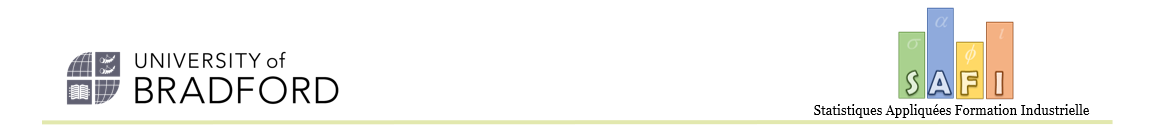

<font size=16>**Tutorial 4 - Planning a Two-Level Experiment**

# About this session

## Objectives

* Develop Python skills for generating two-level full and fractional factorials. This tutorial covers the material included in technical sessions TS04 "Planning a two-level experiment" (see the lecture notes folder)

* This tutorial provides instruction to create a two-level full factorial design of experiments and fractional factorial experiments. The tutorial is standalone and a template with a base code, **DoE Template**, has also been provided for reference and future use.

## Engineering Scenario

The example scenario in this tutorial is related to a study of potential alternative materials for bumper bracket mouldings.

* The brackets are injection moulded (IM).

* In our example, the factors are settings on the IM machine.


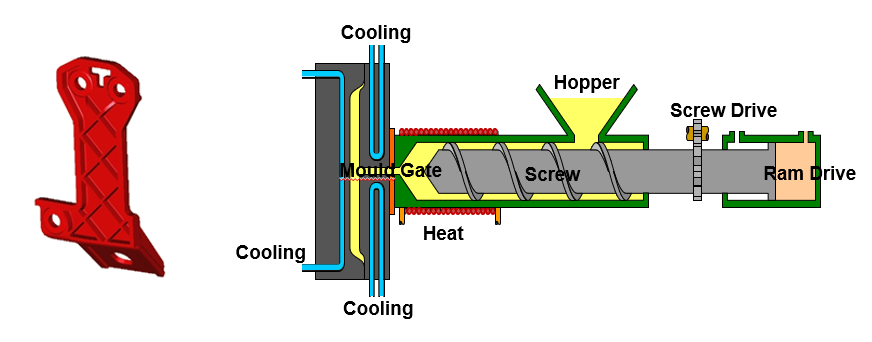

# Tutorial Tasks

1. Generate a coded $2^3$ full factorial design.

2. Export-generated design to be manipulated externally.

3. Convert coded design into engineering units.

4. Generate the model matrix for fitting a '$1^{st}$ order + twist' response surface in three factors.

5. Check if the generated design is orthogonal.

6. Generate a coded $2^{5-1}$ fractional factorial design.

---

# Packages and special code

In this section we install any packages that are not standard Colab then we import the packages that we need need into the Python namespace.



## Uploading files to Colab

1. Click on the "Files" icon on the left hand side of the Colab window (it is a folder symbol). This will take you to the "Files" panel.
2. Drag and drop the file `M05BU.py` onto the Files panel.
3. Click on the "Contents" icon (to the left of the word "Files") to go to the Table of Contents panel.
4. Use the `ls` command to get a folder listing (useful for copying and pasting file names) by running the next cell.

In [1]:
ls

sample_data/


## Package imports

Run the next cell to import the necessary packages into the Python namespace.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from tabulate import tabulate

## Import the courseware

Run the next cell to import the custom courseware. We have used the alias, `bu`, as shorthand for "Bradford Utilities"

In [4]:
import M05BU as bu

In [5]:
#@title 2-Level DoE & RSM Package

import warnings
warnings.filterwarnings('ignore') # turn off warnings

## Import the DoE package

!pip install dexpy # This is the Design of Experiment Package we will use to generate Factorial designs
import dexpy.factorial # functions for DoE
import dexpy.alias # function to generate confounded factors
import dexpy.factorial # functions for DoE
import dexpy.ccd # functions for DoE
import dexpy.optimal
from dexpy.model import make_model, ModelOrder

!pip install pyDoE #  DoE package here for generating latin hypercube design
from pyDOE import * # This command imports all the functions from pyDoE package

## Data Analysis and Manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing # for generating coded units

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D # function of the above library for 3d plots
import matplotlib.ticker as ticker # this is for modifying the ticks location and formatting
import seaborn as sns
import plotly.express as px # interactive plotting tool
from scipy.stats import probplot # to plot normal probability plot
from statsmodels.graphics.api import interaction_plot, abline_plot # function od statsmodels for creating interaction plot

#  Statistical Package + Regresssion
import scipy as sps # a scientific computing package for python,
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.interpolate import interp1d
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from patsy import dmatrix

# Machine Learning packages for model fitting
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error


##############################################################################

######################    Residual Plots    ###################################


def resid_fourpack(student_resid,fits):
  fig, axs = plt.subplots(2, 2) ##creating subplots
  fig.set_size_inches(18, 12)   ## setting figure dimensions

####### Normal Probability Plot #######
  ax = axs[0, 0]
  probplot(student_resid, plot=ax)
  ax.set_title('Normal Probability Plot'); ## Specifying the subplot title
  ax.grid()

####  Deleted Residuals vs Fitted Value Plot   #####
  ax = axs[0, 1]
  ax.plot(fits, student_resid, 'o',color='b')
  ax.set_title('Deleted Residuals vs Fits');
  ax.set_xlabel('Fitted Value')
  ax.set_ylabel('Deleted Residuals')
  ax.set_ylim(-3.5,3.5)
  ax.grid()

#################  Histogram   ######
  ax = axs[1, 0]
  sns.histplot(student_resid, stat='frequency', ax=ax)
  ax.set_title('Histogram');
  ax.set_xlim(-3.5,3.5)
  ax.grid()

#####  Deleted Residuals vs Observation Order   #######
  ax = axs[1, 1]
  ax.plot(student_resid, '-o')
  ax.set_title('Deleted Residuals vs Order');
  ax.set_xlabel('Observation Order')
  ax.set_ylabel('Deleted Residuals');
  ax.set_ylim(-3.5,3.5)
  ax.grid()

###############################################################################

######################    Full Factorial Function    ##########################
def full_fact(k):
  n = 2**(k)
  print('\033[1mExperiment is two level full factorial with', k, 'factors, and', n, 'runs.')
  df = dexpy.factorial.build_factorial(k, n) # Function to generate the design
  d = {
    'X1':'A',
    'X2':'B',
    'X3':'C',
    'X4':'D',
    'X5':'E',
    'X6':'F',
    'X7':'G',
    'X8':'H',
    'X9':'J',
    'X10':'K',
    'X11':'L',
    'X12':'M',
    'X13':'N',
    }
  df = df.rename(columns=d) # Relabling the columns
  print('\nDesign matrix:\n')
  return df

##############################################################################

  ########################## Fractional Factrial Design #####################

def frac_fact(k,p):
  m = 2**(k - p)
  print('Experiment is 1 /', 2**p, 'fraction', k, 'factors, in', m, 'runs.') # Function to generate the design
  # Assigning new labels to the factors
  df = dexpy.factorial.build_factorial(k, m)
  d = {
    'X1':'A',
    'X2':'B',
    'X3':'C',
    'X4':'D',
    'X5':'E',
    'X6':'F',
    'X7':'G',
    'X8':'H',
    'X9':'J',
    'X10':'K',
    'X11':'L',
    'X12':'M',
    'X13':'N',
    }
  df = df.rename(columns=d) # Renaming the columns

  print('\nDesign matrix:\n')

  display(df.head())

  d = {
    1:'A',
    2:'(A+B)**2',
    3:'(A+B+C)**3',
    4:'(A+B+C+D)**4',
    5:'(A+B+C+D+E)**5',
    6:'(A+B+C+D+E+F)**6',
    7:'(A+B+C+D+E+F+G)**7',
    8:'(A+B+C+D+E+F+G+H)**8',
    9:'(A+B+C+D+E+F+G+H+J)**9',
    10:'(A+B+C+D+E+F+G+H+J+K)**10',
    11:'(A+B+C+D+E+F+G+H+J+K+L)**11',
    12:'(A+B+C+D+E+F+G+H+J+K+L+M)**12',
    13:'(A+B+C+D+E+F+G+H+J+K+L+M+N)**13',
    }

  aliases, alias_coefs = dexpy.alias.alias_list(d[k], df) # defining confounded factors or aliases
  print('\n\033[1mAlias Structure\n')
  display(aliases)
  return df, aliases

##############################################################################

##########              Main Effect Plots for 3 Variables       ################

# To increase or decrease the subplots for maineffect plot...
# you will need to define additional axes below
# and also edit 'ncols' as follow 'ncols = number of variables'


def effect_plot3(x1,x2,x3,y,df):

  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, sharey=True);
  fig.set_size_inches(10, 4);
  fig.suptitle('Main Effects Plot for Fitted Means', fontsize=16)

  # This block generates effect plot for the main variables
  sns.lineplot(y=y, x = x1, data=df, color='r', ci=None,ax=ax1);
  ax1.set_ylabel('Mean of y');
  ax1.set_ylim([y.min(), y.max()]); # setting the y-axis limit
  ax1.set_xlim([x1.min(),x1.max()]); # setting the x-axis limit
  ax1.set_xticks([x1.min(),x1.max()]) #setting the x-axis tick location
  ax1.hlines(y=y.mean(), xmin=x1.min(), xmax =x1.max(), linestyles='-.'); # refrence mean response line (dotted line on the graph)

  sns.lineplot(y=y, x = x2, data=df, color='r',ci=None,ax=ax2);
  ax2.set_xlim([x2.min(),x2.max()]); # setting the x-axis limit
  ax2.set_xticks([x2.min(),x2.max()]) #setting the x-axis tick location
  ax2.hlines(y=y.mean(), xmin=x2.min(), xmax =x2.max(), linestyles='-.');

  sns.lineplot(y=y, x = x3, data=df,color='r', ci=None,ax=ax3);
  ax3.set_xlim([x3.min(),x3.max()]); # setting the x-axis limit
  ax3.set_xticks([x3.min(),x3.max()]) #setting the x-axis tick location
  ax3.hlines(y=y.mean(), xmin=x3.min(), xmax =x3.max(), linestyles='-.');

  plt.close()

  ax=(ax1,ax2,ax3)

  return fig, ax

###############################################################################

##########              Main Effect Plots for 4 Variables       ################

# To increase or decrease the subplots for maineffect plot...
# you will need to define additional axes below
# and also edit 'ncols' as follow 'ncols = number of variables'


def effect_plot4(x1,x2,x3,x4,y,df):

  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, sharey=True);
  fig.set_size_inches(10, 4);
  fig.suptitle('Main Effects Plot for Fitted Means', fontsize=16)

  # This block generates effect plot for the main variables
  sns.lineplot(y=y, x = x1, data=df, color='r', ci=None,ax=ax1);
  ax1.set_ylabel('Mean of y');
  ax1.set_ylim([y.min(), y.max()]); # setting the y-axis limit
  ax1.set_xlim([x1.min(),x1.max()]); # setting the x-axis limit
  ax1.set_xticks([x1.min(),x1.max()]) #setting the x-axis tick location
  ax1.hlines(y=y.mean(), xmin=x1.min(), xmax =x1.max(), linestyles='-.'); # refrence mean response line (dotted line on the graph)

  sns.lineplot(y=y, x = x2, data=df, color='r',ci=None,ax=ax2);
  ax2.set_xlim([x2.min(),x2.max()]); # setting the x-axis limit
  ax2.set_xticks([x2.min(),x2.max()]) #setting the x-axis tick location
  ax2.hlines(y=y.mean(), xmin=x2.min(), xmax =x2.max(), linestyles='-.');

  sns.lineplot(y=y, x = x3, data=df,color='r', ci=None,ax=ax3);
  ax3.set_xlim([x3.min(),x3.max()]); # setting the x-axis limit
  ax3.set_xticks([x3.min(),x3.max()]) #setting the x-axis tick location
  ax3.hlines(y=y.mean(), xmin=x3.min(), xmax =x3.max(), linestyles='-.');

  sns.lineplot(y=y, x = x4, data=df,color='r', ci=None,ax=ax4);
  ax4.set_xlim([x4.min(),x4.max()]); # setting the x-axis limit
  ax4.set_xticks([x4.min(),x4.max()]) #setting the x-axis tick location
  ax4.hlines(y=y.mean(), xmin=x4.min(), xmax =x4.max(), linestyles='-.');

  plt.close()
  ax=(ax1,ax2,ax3,ax4)

  return fig, ax

###############################################################################

##########              Main Effect Plots for 5 Variables       ################

# To increase or decrease the subplots for maineffect plot...
# you will need to define additional axes below
# and also edit 'ncols' as follow 'ncols = number of variables'


def effect_plot5(x1,x2,x3,x4,x5,y,df):

  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, sharey=True);
  fig.set_size_inches(10, 4);
  fig.suptitle('Main Effects Plot for Fitted Means', fontsize=16)

  # This block generates effect plot for the main variables
  sns.lineplot(y=y, x = x1, data=df, color='r', ci=None,ax=ax1);
  ax1.set_ylabel('Mean of y');
  ax1.set_ylim([y.min(), y.max()]); # setting the y-axis limit
  ax1.set_xlim([x1.min(),x1.max()]); # setting the x-axis limit
  ax1.set_xticks([x1.min(),x1.max()]) #setting the x-axis tick location
  ax1.hlines(y=y.mean(), xmin=x1.min(), xmax =x1.max(), linestyles='-.'); # refrence mean response line (dotted line on the graph)

  sns.lineplot(y=y, x = x2, data=df, color='r',ci=None,ax=ax2);
  ax2.set_xlim([x2.min(),x2.max()]); # setting the x-axis limit
  ax2.set_xticks([x2.min(),x2.max()]) #setting the x-axis tick location
  ax2.hlines(y=y.mean(), xmin=x2.min(), xmax =x2.max(), linestyles='-.');

  sns.lineplot(y=y, x = x3, data=df,color='r', ci=None,ax=ax3);
  ax3.set_xlim([x3.min(),x3.max()]); # setting the x-axis limit
  ax3.set_xticks([x3.min(),x3.max()]) #setting the x-axis tick location
  ax3.hlines(y=y.mean(), xmin=x3.min(), xmax =x3.max(), linestyles='-.');

  sns.lineplot(y=y, x = x4, data=df,color='r', ci=None,ax=ax4);
  ax4.set_xlim([x4.min(),x4.max()]); # setting the x-axis limit
  ax4.set_xticks([x4.min(),x4.max()]) #setting the x-axis tick location
  ax4.hlines(y=y.mean(), xmin=x4.min(), xmax =x4.max(), linestyles='-.');

  sns.lineplot(y=y, x = x5, data=df,color='r', ci=None,ax=ax5);
  ax5.set_xlim([x5.min(),x5.max()]); # setting the x-axis limit
  ax5.set_xticks([x5.min(),x5.max()]) #setting the x-axis tick location
  ax5.hlines(y=y.mean(), xmin=x5.min(), xmax =x5.max(), linestyles='-.');
  plt.close()
  ax=(ax1,ax2,ax3,ax4,ax5)

  return fig, ax

###############################################################################

###############          Interaction Plot for 3 varaibles      #################

def interact_plot3(x1,x2,x3,y):

  fig,axs = plt.subplots(3,3, figsize=(9,9))
  fig.suptitle('Interaction Plot for y', fontsize=16)

  ax1 = axs[0,0];fig.delaxes(ax1)

  ax2=axs[0,1]
  interaction_plot(x2, x1, y, ax=ax2,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax2.title.set_text('x2*x1')
  ax2.set_xticks([])

  ax3=axs[0,2]
  interaction_plot(x3, x1, y,ax=ax3,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax3.title.set_text('x3*x1')
  ax3.set_ylabel(' ')
  ax3.set_xticks([])
  ax3.set_yticks([])

  ax4=axs[1,0]
  interaction_plot(x1, x2, y, ax=ax4,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax4.title.set_text('x1*x2')
  ax4.set_xticks([])

  ax5=axs[1,1];ax5.set_xticks([]);ax5.set_yticks([])

  ax6=axs[1,2]
  interaction_plot(x3, x2, y,ax=ax6,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x3')
  ax6.title.set_text('x3*x2')
  ax6.set_ylabel(' ')
  ax6.set_yticks([])

  ax7=axs[2,0]
  interaction_plot(x1, x3,  y,ax=ax7,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x1')
  ax7.title.set_text('x1*x3')


  ax8=axs[2,1]
  interaction_plot(x2, x3,  y,ax=ax8,
              colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x2')
  ax8.title.set_text('x2*x3')
  ax8.set_ylabel(' ')
  ax8.set_yticks([])

  ax9=axs[2,2];fig.delaxes(ax9)

  plt.close()
  ax=(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)

  return fig, ax
###############################################################################

###############          Interaction Plot for 5 varaibles      #################

def interact_plot5(x1,x2,x3,x4,x5,y):

  fig,axs = plt.subplots(5,5, figsize=(15,15))
  fig.suptitle('Interaction Plot for y', fontsize=16)

  ### First Row ###

  ax1 = axs[0,0];fig.delaxes(ax1)

  ax2=axs[0,1]
  interaction_plot(x2, x1, y, ax=ax2,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax2.title.set_text('x2*x1')
  ax2.set_xticks([])
  ax2.set_yticks(np.arange(y.min(), y.max(),1))

  ax3=axs[0,2]
  interaction_plot(x3, x1, y, ax=ax3,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax3.title.set_text('x3*x1')
  ax3.set_xticks([])
  ax3.set_yticks([])

  ax4=axs[0,3]
  interaction_plot(x4, x1, y, ax=ax4,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax4.title.set_text('x4*x1')
  ax4.set_xticks([])
  ax4.set_yticks([])

  ax5=axs[0,4]
  interaction_plot(x5, x1, y, ax=ax5,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax5.title.set_text('x5*x1')
  ax5.set_xticks([])
  ax5.set_yticks([])


  ### Second Row ###

  ax6=axs[1,0]
  interaction_plot(x1, x2, y, ax=ax6,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax6.title.set_text('x1*x2')
  ax6.set_xticks([])
  ax6.set_yticks(np.arange(y.min(), y.max(),1))

  ax7 = axs[1,1];fig.delaxes(ax7)

  ax8=axs[1,2]
  interaction_plot(x3, x2, y, ax=ax8,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax8.title.set_text('x3*x2')
  ax8.set_xticks([])
  ax8.set_yticks([])

  ax9=axs[1,3]
  interaction_plot(x4, x2, y, ax=ax9,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax9.title.set_text('x4*x2')
  ax9.set_xticks([])
  ax9.set_yticks([])

  ax10=axs[1,4]
  interaction_plot(x5, x2, y, ax=ax10,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax10.title.set_text('x5*x2')
  ax10.set_xticks([])
  ax10.set_yticks([])


  ### Third Row ###

  ax11=axs[2,0]
  interaction_plot(x1, x3, y, ax=ax11,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax11.title.set_text('x1*x3')
  ax11.set_xticks([])
  ax11.set_yticks(np.arange(y.min(), y.max(),1))

  ax12=axs[2,1]
  interaction_plot(x2, x3, y, ax=ax12,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax12.title.set_text('x2*x3')
  ax12.set_xticks([])
  ax12.set_yticks([])

  ax13=axs[2,2]; fig.delaxes(ax13)

  ax14=axs[2,3]
  interaction_plot(x4, x3, y, ax=ax14,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax14.title.set_text('x4*x3')
  ax14.set_xticks([])
  ax14.set_yticks([])

  ax15=axs[2,4]
  interaction_plot(x5, x3, y, ax=ax15,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax15.title.set_text('x5*x3')
  ax15.set_xticks([])
  ax15.set_yticks([])

  ### Fourth Row ###

  ax16=axs[3,0]
  interaction_plot(x1, x4, y, ax=ax16,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax16.title.set_text('x1*x4')
  ax16.set_xticks([])
  ax16.set_yticks(np.arange(y.min(), y.max(),1))

  ax17=axs[3,1]
  interaction_plot(x2, x4, y, ax=ax17,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax17.title.set_text('x2*x4')
  ax17.set_xticks([])
  ax17.set_yticks([])

  ax18=axs[3,2]
  interaction_plot(x3, x4, y, ax=ax18,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel=' ')
  ax18.title.set_text('x3*x4')
  ax18.set_xticks([])
  ax18.set_yticks([])

  ax19=axs[3,3];fig.delaxes(ax19)

  ax20=axs[3,4]
  interaction_plot(x5, x4, y, ax=ax20,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x5')
  ax20.title.set_text('x5*x4')
  ax20.set_yticks([])

  ### Fifth Row ###

  ax21=axs[4,0]
  interaction_plot(x1, x5, y, ax=ax21,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x1')
  ax21.title.set_text('x1*x5')
  ax21.set_yticks(np.arange(y.min(), y.max(),1))

  ax22=axs[4,1]
  interaction_plot(x2, x5, y, ax=ax22,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x2')
  ax22.title.set_text('x2*x5')
  ax22.set_yticks([])

  ax23=axs[4,2]
  interaction_plot(x3, x5, y, ax=ax23,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x3')
  ax23.title.set_text('x3*x5')
  ax23.set_yticks([])

  ax24=axs[4,3]
  interaction_plot(x4, x5, y, ax=ax24,
            colors=['red','blue'], markers=['D','^'], ylabel='y', xlabel='x4')
  ax24.title.set_text('x4*x5')
  ax24.set_yticks([])

  ax25=axs[4,4]; fig.delaxes(ax25)

  plt.close()
  ax=(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,
      ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,ax25)
  return fig, ax


###############################################################################

##########        Surface Plot for the model with 3 variables  ################

def surf_plot3(x1,x2,x3,y):
  a1 = x1
  a2 = x2
  a3 = x3

  fig = plt.figure(figsize=(14,7))
  fig.suptitle('Surface Plot for y', fontsize=15)

  x1 = np.linspace(a1.min(), a1.max(), 50)
  x2 = np.linspace(a2.min(), a2.max(), 50)
  x3 = np.linspace(a3.min(), a3.max(), 50)

  #### Subplot 1 ###
  ax1 = fig.add_subplot(1,3,1,projection='3d')
  xx2, xx1 = np.meshgrid(x2, x1)

  #### Interpolate unstructured D-dimensional data ####.
  z1 = sps.interpolate.griddata((a2, a1), y, (xx2, xx1), method='cubic')
  surf = ax1.plot_surface(xx2, xx1, z1,cmap='viridis') # surface plot function
  ax1.set_xlabel('\nx2', fontsize=14) # x-axis label
  ax1.set_ylabel('\nx1', fontsize=14) # y-axis label
  ax1.set_zlabel('\n y', fontsize=14) #z-axis label
  ax1.set_zlim(y.min(),y.max()) # z-axis scale
  ax1.view_init(30, 30) # viewing angle

  #### Subplot 2 ####
  ax2 = fig.add_subplot(1,3,2, projection='3d')
  xx3, xx1 = np.meshgrid(x3, x1)
  z2 = sps.interpolate.griddata((a3,a1), y, (xx3, xx1), method='cubic')
  surf = ax2.plot_surface(xx3, xx1, z2,cmap='viridis')
  ax2.set_xlabel('\nx3', fontsize=14)
  ax2.set_ylabel('\nx1', fontsize=14)
  ax2.set_zlim(y.min(),y.max())
  ax2.view_init(10, 30)

  #### Subplot 3 ####
  ax3 = fig.add_subplot(1,3,3, projection='3d')
  xx3, xx2 = np.meshgrid(x3, x2)
  z3 = sps.interpolate.griddata((a3, a2), y, (xx3, xx2), method='cubic')
  surf = ax3.plot_surface(xx3, xx2, z3,cmap='viridis')
  ax3.set_xlabel('\nx3', fontsize=14)
  ax3.set_ylabel('\nx2', fontsize=14)
  ax3.set_zlim(y.min(),y.max())
  ax3.view_init(10, 30)
  plt.close()
  ax=(ax1,ax2,ax3)
  return fig, ax

###############################################################################

##########        Surface Plot for the model with 4 variables  ################

def surf_plot4(x1,x2,x3,x4,y):
  a1 = x1
  a2 = x2
  a3 = x3
  a4 = x4

  fig = plt.figure(figsize=(18,9),tight_layout="rect")
  fig.suptitle('Surface Plot for y', fontsize=15)

  x1 = np.linspace(a1.min(), a1.max(), 50)
  x2 = np.linspace(a2.min(), a2.max(), 50)
  x3 = np.linspace(a3.min(), a3.max(), 50)
  x4 = np.linspace(a4.min(), a4.max(), 50)

  #### Subplot 1 ###
  ax1 = fig.add_subplot(2,3,1,projection='3d')
  xx2, xx1 = np.meshgrid(x2, x1)

  #### Interpolate unstructured D-dimensional data ####.
  z1 = sps.interpolate.griddata((a2, a1), y, (xx2, xx1), method='cubic')
  surf = ax1.plot_surface(xx2, xx1, z1,cmap='viridis') # surface plot function
  ax1.set_xlabel('\nx2', fontsize=14) # x-axis label
  ax1.set_ylabel('\nx1', fontsize=14) # y-axis label
  ax1.set_zlabel('\ny', fontsize=14) #z-axis label
  ax1.set_zlim(y.min(),y.max()) # z-axis scale
  ax1.view_init(30, 30) # viewing angle

  #### Subplot 2 ####
  ax2 = fig.add_subplot(2,3,2, projection='3d')
  xx3, xx1 = np.meshgrid(x3, x1)
  z2 = sps.interpolate.griddata((a3,a1), y, (xx3, xx1), method='cubic')
  surf = ax2.plot_surface(xx3, xx1, z2,cmap='viridis')
  ax2.set_xlabel('\nx3', fontsize=14)
  ax2.set_ylabel('\nx1', fontsize=14)
  ax2.set_zlim(y.min(),y.max())
  ax2.view_init(10, 30)

  #### Subplot 3 ####
  ax3 = fig.add_subplot(2,3,3, projection='3d')
  xx4, xx1 = np.meshgrid(x4, x1)
  z3 = sps.interpolate.griddata((a4, a1), y, (xx4, xx1), method='cubic')
  surf = ax3.plot_surface(xx4, xx1, z3,cmap='viridis')
  ax3.set_xlabel('\nx4', fontsize=14)
  ax3.set_ylabel('\nx1', fontsize=14)
  ax3.set_zlim(y.min(),y.max())
  ax3.view_init(10, 30)


   #### Subplot 4 ####
  ax4 = fig.add_subplot(2,3,4, projection='3d')
  xx3, xx2 = np.meshgrid(x3, x2)
  z4 = sps.interpolate.griddata((a3, a2), y, (xx3, xx2), method='cubic')
  surf = ax4.plot_surface(xx3, xx2, z4,cmap='viridis')
  ax4.set_xlabel('\nx3', fontsize=14)
  ax4.set_ylabel('\nx2', fontsize=14)
  ax4.set_zlabel('\ny', fontsize=14)
  ax4.set_zlim(y.min(),y.max())
  ax4.view_init(10, 30)

     #### Subplot 5 ####
  ax5 = fig.add_subplot(2,3,5, projection='3d')
  xx4, xx2 = np.meshgrid(x4, x2)
  z5= sps.interpolate.griddata((a4, a2), y, (xx4, xx2), method='cubic')
  surf = ax5.plot_surface(xx4, xx2, z5,cmap='viridis')
  ax5.set_xlabel('\nx4', fontsize=14)
  ax5.set_ylabel('\nx2', fontsize=14)
  ax5.set_zlim(y.min(),y.max())
  ax5.view_init(10, 30)



         #### Subplot 6 ####
  ax6 = fig.add_subplot(2,3,6, projection='3d')
  xx4, xx3 = np.meshgrid(x4, x3)
  z6= sps.interpolate.griddata((a4, a3), y, (xx4, xx3), method='cubic')
  surf = ax6.plot_surface(xx4, xx3, z6,cmap='viridis')
  ax6.set_xlabel('\nx4', fontsize=14)
  ax6.set_ylabel('\nx3', fontsize=14)
  ax6.set_zlim(y.min(),y.max())
  ax6.view_init(10, 30)


  ax =(ax1,ax2,ax3,ax4,ax5,ax6)
  plt.close()

  return fig, ax


###############################################################################

##########        Surface Plot for the model with 5 variables  ################

def surf_plot5(x1,x2,x3,x4,x5,y):
  a1 = x1
  a2 = x2
  a3 = x3
  a4 = x4
  a5 = x5

  fig = plt.figure(figsize=(18,9),tight_layout="rect")
  fig.suptitle('Surface Plot for y', fontsize=15)

  x1 = np.linspace(a1.min(), a1.max(), 50)
  x2 = np.linspace(a2.min(), a2.max(), 50)
  x3 = np.linspace(a3.min(), a3.max(), 50)
  x4 = np.linspace(a4.min(), a4.max(), 50)
  x5 = np.linspace(a5.min(), a5.max(), 50)

  #### Subplot 1 ###
  ax1 = fig.add_subplot(2,5,1,projection='3d')
  xx2, xx1 = np.meshgrid(x2, x1)

  #### Interpolate unstructured D-dimensional data ####.
  z1 = sps.interpolate.griddata((a2, a1), y, (xx2, xx1), method='cubic')
  surf = ax1.plot_surface(xx2, xx1, z1,cmap='viridis') # surface plot function
  ax1.set_xlabel('\nx2', fontsize=14) # x-axis label
  ax1.set_ylabel('\nx1', fontsize=14) # y-axis label
  ax1.set_zlabel('\ny', fontsize=14) #z-axis label
  ax1.set_zlim(y.min(),y.max()) # z-axis scale
  ax1.view_init(30, 30) # viewing angle

  #### Subplot 2 ####
  ax2 = fig.add_subplot(2,5,2, projection='3d')
  xx3, xx1 = np.meshgrid(x3, x1)
  z2 = sps.interpolate.griddata((a3,a1), y, (xx3, xx1), method='cubic')
  surf = ax2.plot_surface(xx3, xx1, z2,cmap='viridis')
  ax2.set_xlabel('\nx3', fontsize=14)
  ax2.set_ylabel('\nx1', fontsize=14)
  ax2.set_zlim(y.min(),y.max())
  ax2.view_init(10, 30)

  #### Subplot 3 ####
  ax3 = fig.add_subplot(2,5,3, projection='3d')
  xx4, xx1 = np.meshgrid(x4, x1)
  z3 = sps.interpolate.griddata((a4, a1), y, (xx4, xx1), method='cubic')
  surf = ax3.plot_surface(xx4, xx1, z3,cmap='viridis')
  ax3.set_xlabel('\nx4', fontsize=14)
  ax3.set_ylabel('\nx1', fontsize=14)
  ax3.set_zlim(y.min(),y.max())
  ax3.view_init(10, 30)

    #### Subplot 4 ####
  ax4 = fig.add_subplot(2,5,4, projection='3d')
  xx5, xx1 = np.meshgrid(x5, x1)
  z4 = sps.interpolate.griddata((a5, a1), y, (xx5, xx1), method='cubic')
  surf = ax4.plot_surface(xx5, xx1, z4,cmap='viridis')
  ax4.set_xlabel('\nx5', fontsize=14)
  ax4.set_ylabel('\nx1', fontsize=14)
  ax4.set_zlim(y.min(),y.max())
  ax4.view_init(10, 30)

   #### Subplot 5 ####
  ax5 = fig.add_subplot(2,5,5, projection='3d')
  xx3, xx2 = np.meshgrid(x3, x2)
  z5 = sps.interpolate.griddata((a3, a2), y, (xx3, xx2), method='cubic')
  surf = ax5.plot_surface(xx3, xx2, z5,cmap='viridis')
  ax5.set_xlabel('\nx3', fontsize=14)
  ax5.set_ylabel('\nx2', fontsize=14)
  ax5.set_zlim(y.min(),y.max())
  ax5.view_init(10, 30)

     #### Subplot 6 ####
  ax6 = fig.add_subplot(2,5,6, projection='3d')
  xx4, xx2 = np.meshgrid(x4, x2)
  z6= sps.interpolate.griddata((a4, a2), y, (xx4, xx2), method='cubic')
  surf = ax6.plot_surface(xx4, xx2, z6,cmap='viridis')
  ax6.set_xlabel('\nx4', fontsize=14)
  ax6.set_ylabel('\nx2', fontsize=14)
  ax6.set_zlabel('\ny', fontsize=14)
  ax6.set_zlim(y.min(),y.max())
  ax6.view_init(10, 30)

       #### Subplot 7 ####
  ax7 = fig.add_subplot(2,5,7, projection='3d')
  xx5, xx2 = np.meshgrid(x5, x2)
  z7= sps.interpolate.griddata((a5, a2), y, (xx5, xx2), method='cubic')
  surf = ax7.plot_surface(xx5, xx2, z7,cmap='viridis')
  ax7.set_xlabel('\nx5', fontsize=14)
  ax7.set_ylabel('\nx2', fontsize=14)
  ax7.set_zlim(y.min(),y.max())
  ax7.view_init(10, 30)

         #### Subplot 8 ####
  ax8 = fig.add_subplot(2,5,8, projection='3d')
  xx4, xx3 = np.meshgrid(x4, x3)
  z8= sps.interpolate.griddata((a4, a3), y, (xx4, xx3), method='cubic')
  surf = ax8.plot_surface(xx4, xx3, z8,cmap='viridis')
  ax8.set_xlabel('\nx4', fontsize=14)
  ax8.set_ylabel('\nx3', fontsize=14)
  ax8.set_zlim(y.min(),y.max())
  ax8.view_init(10, 30)

           #### Subplot 9 ####
  ax9 = fig.add_subplot(2,5,9, projection='3d')
  xx5, xx3 = np.meshgrid(x5, x3)
  z9= sps.interpolate.griddata((a5, a3), y, (xx5, xx3), method='cubic')
  surf = ax9.plot_surface(xx5, xx3, z9,cmap='viridis')
  ax9.set_xlabel('\nx4', fontsize=14)
  ax9.set_ylabel('\nx3', fontsize=14)
  ax9.set_zlim(y.min(),y.max())
  ax9.view_init(10, 30)

           #### Subplot 10 ####
  ax10 = fig.add_subplot(2,5,10, projection='3d')
  xx5, xx4 = np.meshgrid(x5, xx4)
  z10= sps.interpolate.griddata((a5, a4), y, (xx5, xx4), method='cubic')
  surf = ax10.plot_surface(xx5, xx4, z10,cmap='viridis')
  ax10.set_xlabel('\nx4', fontsize=14)
  ax10.set_ylabel('\nx3', fontsize=14)
  ax10.set_zlim(y.min(),y.max())
  ax10.view_init(10, 30)

  ax =(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)
  plt.close()

  return fig, ax


##################   Half Normal plot using Lenth’s method    ##################

def PSE(model,alpha):
  pcrit = alpha # Change this to alter the significance
  CD = pd.DataFrame()
  results=model
  x = results.params.drop(labels='Intercept')
  CD['coef'] = x
  CD['effect'] = 2*x
  CD['count'] = range(len(x))
  x = abs(2*x)
  CD['osr'] = x
  CD = CD.sort_values(by='osr')
  (osm, osr) = probplot(x, dist=stats.halfnorm, fit=False)
  CD['osm'] = osm
  x = x[x <= 3.75*x.median()]
  PSE = 1.5*x.median()
  CD['T-value'] = CD['effect']/PSE
  nu = int(len(x)/3)
  T = stats.t(nu)
  CD['p-value'] = np.around(2 - 2*T.cdf(abs(CD['T-value'])), 3)
  CD2 = CD[CD['p-value'] < pcrit]
  CD = CD.sort_values(by='count')
  CD = CD.drop(labels=['count', 'osr', 'osm'], axis=1)
  print('Coded coefficients and Lenth\'s pseudo T- and p- values')
  print()
  print(CD)
  print()
  osm2 = [0, 2]
  osr2 = [0, 2*PSE]
  plt.scatter(osm, osr)
  for term in CD2.index:
    plt.annotate(term, (CD2['osm'][term]+0.05, CD2['osr'][term]))
    plt.plot(CD2['osm'][term], CD2['osr'][term], 'ro')
  plt.title('Daniels plot using Lenth\'s PSE with alpha = ' + str(pcrit))
  plt.xlabel('Half normal score')
  plt.ylabel('Absolute effect')
  plt.plot(osm2, osr2, 'r');
  return CD
warnings.simplefilter(action='ignore', category=FutureWarning)

# Task 1

## 1.1 Generate a two-level full factorial design
Edit the following cell to **specify the number of factors**.
```
full_fact(k)

where k is the number of factors
```
* In the design presented below, there are total 3 factors with 2 levels.

**Note:** The `full_fact` function utilises the base function from dexpy Python Package (`dexpy.factorial.build_factorial(k, n)`), for further details see the project link - https://pypi.org/project/dexpy/

In [6]:
df = bu.full_fact(3)        # Edit the number of factors for your own design ('3' in this case)

Experiment is two level full factorial with 3 factors, and 8 runs.

Design matrix:



,A,B,C
0,-1,-1,-1
1,-1,-1,1
2,-1,1,-1
3,-1,1,1
4,1,-1,-1
5,1,-1,1
6,1,1,-1
7,1,1,1


## 1.2 Visualise you design

Create a 3D scatter plot for visualisation of the experimental plan (showing where the test points are placed in the cube that defines the experimental space).

The figure uses the Plotly interactive library and can be zoomed in and rotated with the mouse.

In [7]:
fig = px.scatter_3d(
  df,
  x=df['A'],
  y=df['B'],
  z=df['C']
)

fig.update_layout(
  autosize=False,
  width=800,
  height=600
)

fig.show()

- The plot above illustrates the factor space where $x-$variables are located.

- The design above is symmetrical, and the symmetry of this pattern gives it good statistical properties.
  - For example, the $x-$variables are uncorrelated and we will explore this in Task 4.

# Task 2

## 2.1 Export generated design

This cell saves the design matrix as a csv file so that it can be downloaded and the experimental results can be added to a spreadsheet application.

  * For example, this is useful if you want to run a physical experiment (or even a computer simulation experiment), where you find it more convenient to have the experiment planning in a spreadsheet - and later to add the results in the same spreadsheet.

*Alternative:* This can also be exported into excel file format by using the following command

```
df.to_excel('TwoLevelDOE.xlsx', index=False)
```

In [8]:
df.to_csv('TwoLevelDOE.csv', index=False)

## Task 3

## 3.1 Convert coded design into engineering units

This cell converts the design to uncoded units and gives the columns meaningful names.

Implemented - for illustration, with 3 factors.

**Note:**  If you want to use this for your own purpose, you will have to adjust the code according to your own problem / needs. You should probe this with the exercise case study for the catapult.

In [10]:
# Creating a copy of original design
# This is not a necessary step and implemented here for illustration purposes
# Assigning meanigful names to the columns edit according to the design requirements.
meaningful_df = df.copy()
meaningful_df.columns = ['amount', 'grind_size', 'brew_time']

In [11]:
# Define the the lower limit values of the design variables.
actual_lows = {
  'amount': 2.5,
  'grind_size': 8.0,
  'brew_time': 3.5
}
actual_highs = {
  'amount' : 4.0,
  'grind_size': 10.0,
  'brew_time': 4.5
}

In [12]:
# converting the design to uncoded units
actual_design = dexpy.design.coded_to_actual(
  meaningful_df, actual_lows, actual_highs
)

In [13]:
display(actual_design)

,amount,grind_size,brew_time
0,2.5,8.0,3.5
1,2.5,8.0,4.5
2,2.5,10.0,3.5
3,2.5,10.0,4.5
4,4.0,8.0,3.5
5,4.0,8.0,4.5
6,4.0,10.0,3.5
7,4.0,10.0,4.5


## Task 4

## 4.1 Generate the model matrix

This Cell produces the two-factor interaction terms  $(2fi)$, i.e. $x1*x2$ or $A*B$ (which gives the twist effect to a first-order surface) and adds this to the experiment matrix.

* Refer to lecture sessions (TS4, slides 9 and 19) for more details.

In [14]:
# This cell appends the interaction terms to the design matrix above.
df['AB'] = df['A'] * df['B']
df['AC'] = df['A'] * df['C']
df['BC'] = df['B'] * df['C']

In [15]:
df

,A,B,C,AB,AC,BC
0,-1,-1,-1,1,1,1
1,-1,-1,1,1,-1,-1
2,-1,1,-1,-1,1,-1
3,-1,1,1,-1,-1,1
4,1,-1,-1,-1,-1,1
5,1,-1,1,-1,1,-1
6,1,1,-1,1,-1,-1
7,1,1,1,1,1,1


## Task 5: Check if design is orthogonal.

## 5.1 Produce correlation matrix

This cell evaluates the orthogonality of the design, i.e. checks that factors are uncorrelated in the experimental plan. What we are looking for is that the correlation coefficient ($r^2$) is zero.

**Additional Task:** Try another representation of the correlation matrix using the following code and spot the difference::
```
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(8,4))
fig =sns.heatmap(corr, mask = mask, linewidth=0.5,annot=True)

```

For additional functionality and options refer to the following link:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [16]:
corr = df.corr(method='pearson')
print('Correlaction Matrix\n')
display(corr)

Correlaction Matrix



,A,B,C,AB,AC,BC
A,1.000000e+00,-5.551115e-17,0.000000e+00,-5.551115e-17,0.000000e+00,0.000000e+00
B,-5.551115e-17,1.000000e+00,-2.775558e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17
C,0.000000e+00,-2.775558e-17,1.000000e+00,5.551115e-17,0.000000e+00,0.000000e+00
AB,-5.551115e-17,-2.775558e-17,5.551115e-17,1.000000e+00,-2.775558e-17,-2.775558e-17
AC,0.000000e+00,-2.775558e-17,0.000000e+00,-2.775558e-17,1.000000e+00,0.000000e+00
BC,0.000000e+00,-2.775558e-17,0.000000e+00,-2.775558e-17,0.000000e+00,1.000000e+00


## 5.2 Produce heatmap



 Heatmap of the generated DoE


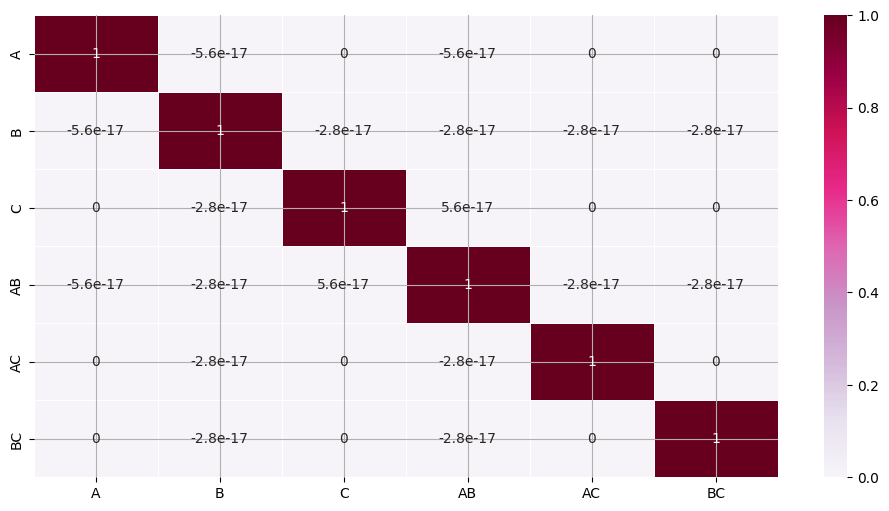

In [17]:
print('\n\n \033[1mHeatmap of the generated DoE')
fig = plt.figure(figsize=(12,6))
fig = sns.heatmap(corr, annot=True, linewidths=0.5, cmap = 'PuRd')

The correlation coefficient measured above indicates the strength and direction of the linear relationship among the variables.

- From the results above we can determine that the designed variables above are uncorrelated, i.e. correlation = 0.

- This concept was presented in the technical session as follows:

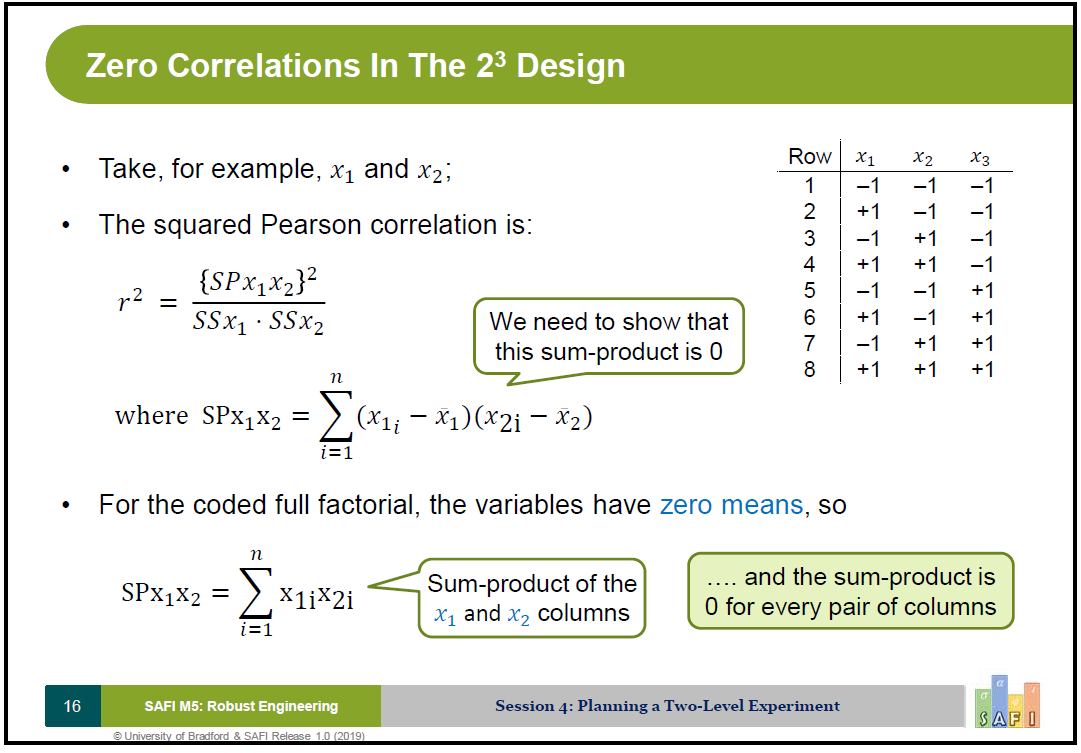

## Task 6

## 6.1 Generate a two level fractional factorial design

Edit the following function to **specify the number of factors (k) and size of the fraction (p)**.
```
frac_fact(k, p)

where k is the number of factors

and p is the size of the fraction

```
-  for an example, if generating a $1/2$ fractional factorial design, $1/2$ fraction can be written as $2^{-1}$, thus,  $p =1$.


**Note:**  The `frac_fact` function utilises the base function from dexpy Python Package (`dexpy.factorial.build_factorial(k, n)`) where  **n** defines the number of runs and is equal to $2^{k-p}$.

    For further details see the project link - https://pypi.org/project/dexpy/

Run the following cell to generate a  1/2 fractional factorial design with total of 5 factors (2- level) or $2^{(5-1)}$ design.

In [18]:
df, alias = bu.frac_fact(5, 1)      # edit the cell to alter the factors and fraction

Experiment is 1 / 2 fraction 5 factors, in 16 runs.

Design matrix



,A,B,C,D,E
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1






Alias Structure



['Intercept = A:B:C:D:E',
 'A = B:C:D:E',
 'B = A:C:D:E',
 'C = A:B:D:E',
 'D = A:B:C:E',
 'E = A:B:C:D',
 'A:B = C:D:E',
 'A:C = B:D:E',
 'A:D = B:C:E',
 'A:E = B:C:D',
 'B:C = A:D:E',
 'B:D = A:C:E',
 'B:E = A:C:D',
 'C:D = A:B:E',
 'C:E = A:B:D',
 'D:E = A:B:C']

We will discuss and analyse the significance of the aliases in the next tutorial.